# Movimento de Projéteis com Resistência do Ar

In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['science','notebook'])

 Podemos quebrar a 2ª Lei de Newton em 
 
 $$ \frac{d\mathbf{r}}{d t}  = \mathbf{v}$$
 $$ m\frac{d\mathbf{v}}{d t}  = m\mathbf{g} - b \mathbf{v}$$


In [2]:
def projetil_analitico(u0,t,args):
    b, g = args
    x,y,vx,vy = u0
    return [x+vx*t,y+vy*t-0.5*g*t**2,vx,vy-g*t]

In [3]:
def edo_projectile(u,t,args):
    b, g = args
    x,y,vx,vy = u
    dudt = np.array([vx,vy,-b*vx, -b*vy - g])
    return dudt

In [4]:
b = 0.1
g = 9.81

args = [b,g]

In [5]:
theta = np.pi/4
v0 = 10.0

u0 = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)])

In [6]:
t = np.arange(0,1.5,0.001)

u = np.zeros((4,t.size))

## Método de Euler

$$ \frac{dx}{dt} = f$$

então

$$ x_{t+h} = x_t + f_t h$$

In [7]:
def solver_Euler(u,u0,t,args):
    u[:,0] = u0
    for i in range(1,t.size):
        dudt = edo_projectile(u[:,i-1],t[i-1],args)
        u[:,i] = u[:,i-1] + dudt*(t[i]-t[i-1])
    return u

In [8]:
sol_ode = solver_Euler(u,u0,t,args)
sol_ana = projetil_analitico(u0,t,args)

(0.0, 2.707877368473875)

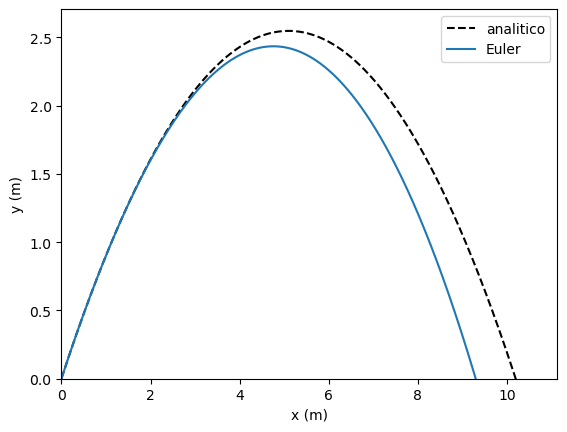

In [9]:
plt.plot(sol_ana[0],sol_ana[1],'--k',label='analitico')
plt.plot(sol_ode[0],sol_ode[1],label='Euler')
# plt.scatter(xmax,ymax,color='r',s=100,zorder=10)
# plt.scatter(xr,0.0,color='r',s=100,zorder=10)
plt.legend(loc='best')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)

# Usando solve_ivp

In [10]:
def projectile_ivp(t,u, b, g):
    x,y,vx,vy = u
    dydt = [vx,vy,-b*vx, -b*vy - g]
    return dydt

In [11]:
from scipy.integrate import solve_ivp

In [12]:
sol_ivp = solve_ivp(projectile_ivp, t_span=[0, t[-1]], y0=u0, method='LSODA', args=(b, g),t_eval=t)

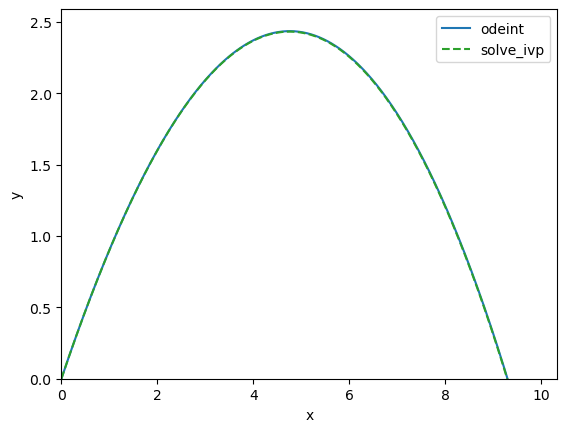

In [13]:
plt.plot(sol_ode[0],sol_ode[1],label='odeint')
plt.plot(sol_ivp.y[0],sol_ivp.y[1],'--C2',label='solve_ivp')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(loc='best')

# Testando Performance

In [14]:
%timeit -r 10 -n 10000 sol_ode = odeint(projectile, y0, t, args=(b, g))

NameError: name 'odeint' is not defined

In [ ]:
%timeit -r 10 -n 10000 sol_ivp = solve_ivp(projectile_ivp, t_span=[0, t[-1]], y0=y0, method='LSODA', args=(b, g),t_eval=t)

744 µs ± 15 µs per loop (mean ± std. dev. of 10 runs, 10,000 loops each)
